# Week 04
---
* Working with real data
* Unzip Files
* Splited on train and test

**[Colab Version](https://colab.research.google.com/drive/1P-gigUx65pw0KSDyBrCC-bmUeOFa15uS)**

## Download And Preparing Data 
---
Download images:

In [1]:
# Training Data

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-01-29 07:06:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 2607:f8b0:4001:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   106MB/s    in 1.3s    

2020-01-29 07:06:18 (106 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
# Validation Data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2020-01-29 07:06:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 2607:f8b0:4001:c14::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2020-01-29 07:06:54 (94.2 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



In [0]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

local_zip = '/tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/validation-horse-or-human')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/horse-or-human`, which in turn each contain `horses` and `humans` subdirectories.

In [0]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/tmp/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/tmp/validation-horse-or-human/humans')

In [6]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse43-1.png', 'horse04-5.png', 'horse08-2.png', 'horse35-6.png', 'horse36-5.png', 'horse28-8.png', 'horse34-3.png', 'horse45-7.png', 'horse07-8.png', 'horse20-1.png']
['human16-02.png', 'human01-00.png', 'human01-25.png', 'human10-04.png', 'human12-14.png', 'human16-24.png', 'human12-30.png', 'human06-01.png', 'human16-25.png', 'human05-00.png']


In [8]:
# Total Number Images In Directories
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

print('\ntotal validation horse images:', len(os.listdir(validation_horse_dir)))
print('total validation human images:', len(os.listdir(validation_human_dir)))

total training horse images: 500
total training human images: 527

total validation horse images: 128
total validation human images: 128


### Show Images

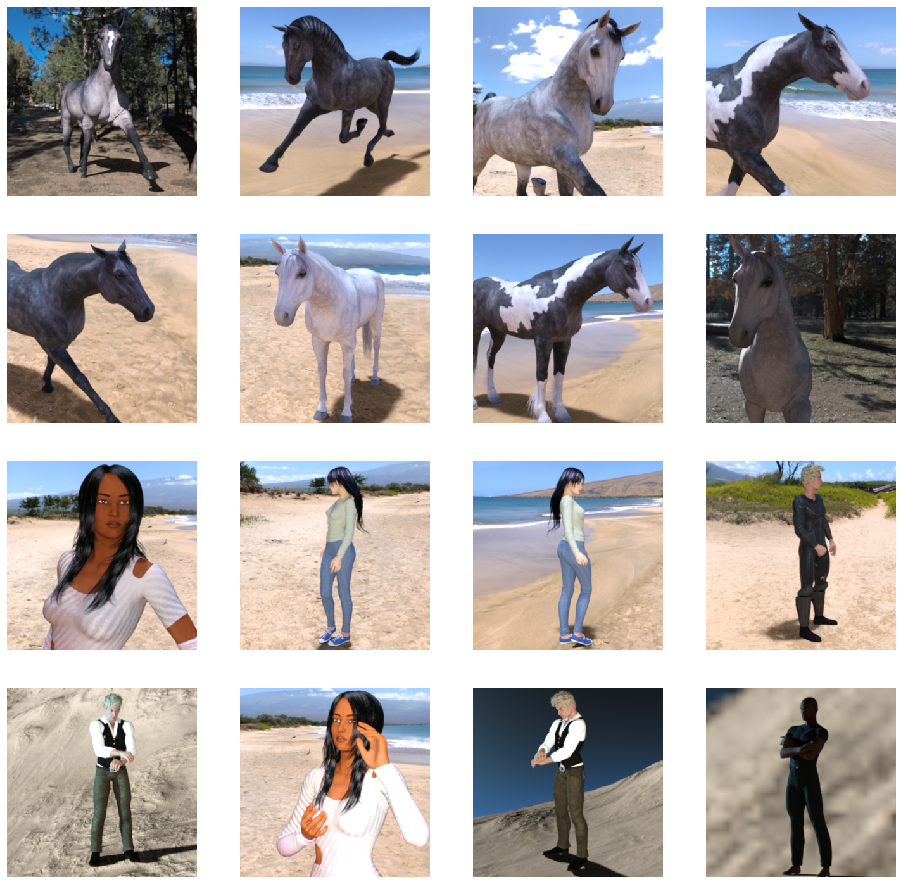

In [17]:
# We display a batch of 8 horse and 8 human pictures. 

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


## Horse or Human With Large Images(300 x 300) - Build Model
---

### Model Building 
Should be looking at:
* First Layer with `input_shape=(300, 300, 3)` - RGB Channel Last Number
* Last layer with `activation='sigmoid'` it's for binary classification(0 or 1) and **one output neuron** 

In [9]:
import tensorflow as tf

In [10]:
model = tf.keras.models.Sequential([
    # 5 Conv Layers With MaxPolling 

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten Layer In One Array
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation='relu'),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________

Configure the specifications for model training. We will train our model with the **`binary_crossentropy` loss, because it's a binary classification problem** and our final activation is a sigmoid. 

In [11]:
from tensorflow.keras.optimizers import RMSprop
# It's for binary signals
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


### Data Preprocessing (ImageDataGenerator)

This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. 

* **`Batch_Size = 128`** - Our batch size it's 128. In train directory 1024 files, if we wanna load all image in one epoch, we need 8 steps. (1024 / 128) = 8. **For Validation We Get Less Batch = 32**
* **`steps_per_epoch=8`** - In next cell we initialize this parameter 
* **`target_size=(300,300)`** - Resize Image By One Size


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Normalization Data 
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Validation Generator 
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training




In [15]:
# Steps Per Epochs
history = model.fit_generator(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      validation_data=validation_generator,
      validation_steps=8,
      verbose=2)


Epoch 1/15
Epoch 1/15
8/8 - 1s - loss: 3.0566 - acc: 0.8672
8/8 - 7s - loss: 8.4014e-06 - acc: 1.0000 - val_loss: 3.0566 - val_acc: 0.8672
Epoch 2/15
Epoch 1/15
8/8 - 1s - loss: 3.0865 - acc: 0.8711
8/8 - 7s - loss: 4.8841e-06 - acc: 1.0000 - val_loss: 3.0865 - val_acc: 0.8711
Epoch 3/15
Epoch 1/15
8/8 - 1s - loss: 3.2338 - acc: 0.8711
8/8 - 6s - loss: 3.0947e-06 - acc: 1.0000 - val_loss: 3.2338 - val_acc: 0.8711
Epoch 4/15
Epoch 1/15
8/8 - 1s - loss: 3.4003 - acc: 0.8711
8/8 - 7s - loss: 3.9785e-06 - acc: 1.0000 - val_loss: 3.4003 - val_acc: 0.8711
Epoch 5/15
Epoch 1/15
8/8 - 1s - loss: 3.4097 - acc: 0.8711
8/8 - 7s - loss: 1.2235e-06 - acc: 1.0000 - val_loss: 3.4097 - val_acc: 0.8711
Epoch 6/15
Epoch 1/15
8/8 - 1s - loss: 3.3124 - acc: 0.8750
8/8 - 7s - loss: 8.6407e-07 - acc: 1.0000 - val_loss: 3.3124 - val_acc: 0.8750
Epoch 7/15
Epoch 1/15
8/8 - 1s - loss: 3.6903 - acc: 0.8711
8/8 - 7s - loss: 7.7128e-07 - acc: 1.0000 - val_loss: 3.6903 - val_acc: 0.8711
Epoch 8/15
Epoch 1/15
8/8 -

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving Horse.jpg to Horse.jpg
[1.]
Horse.jpg is a human


### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


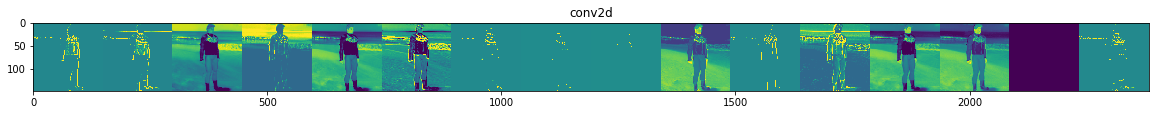

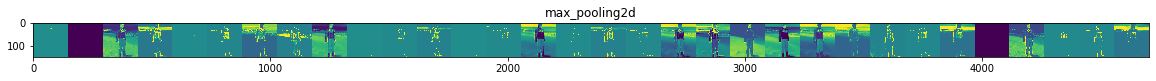

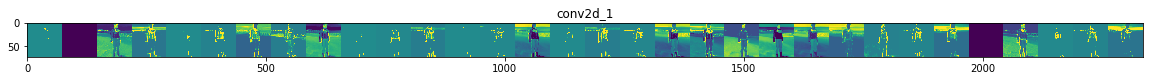

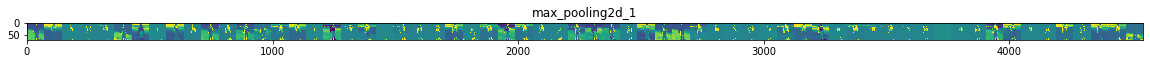

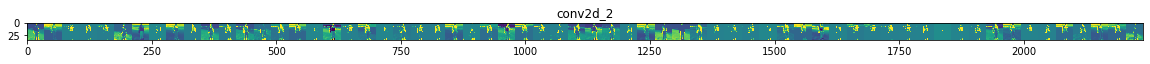

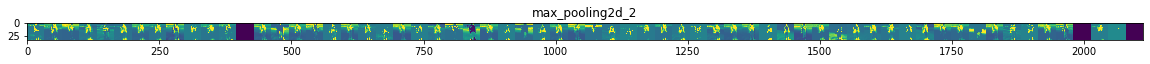

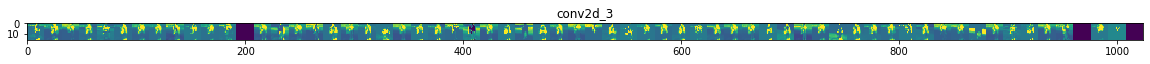

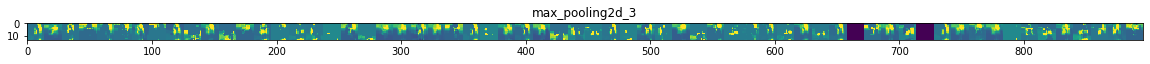

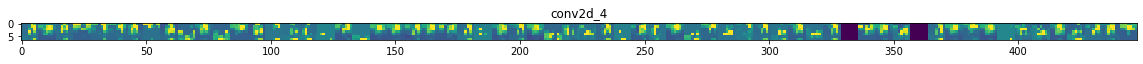

In [18]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

As you can see we go from the raw pixels of the images to increasingly abstract and compact representations. The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being "activated"; most are set to zero. This is called "sparsity." Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline.

## Horse or Human With Small Image(150x150) and Network

### Build Model

* Network with 3 Conv2D Layers
* Don't Forgot About Kernel Size in Conv2D
* Don't Forgot About Third Channel In Input Shape

In [23]:
model_small = tf.keras.Sequential([
 tf.keras.layers.Conv2D(32, (3, 3), activation=tf.nn.relu, input_shape=(150, 150, 3)),
 tf.keras.layers.MaxPool2D(2, 2),
 tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
 tf.keras.layers.MaxPool2D(2, 2),
 tf.keras.layers.Conv2D(64, (3, 3), activation=tf.nn.relu),
 
 tf.keras.layers.Flatten(),
 tf.keras.layers.Dense(128, activation=tf.nn.relu),
 tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)                                  
])

model_small.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

### Image Data Generation

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generation = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size=(150, 150), # Rescale Images
    batch_size=128,
    class_mode = 'binary'
)

# Validation Generator 
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generation = validation_datagen.flow_from_directory(
    '/tmp/validation-horse-or-human',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Compile Model

In [0]:
model_small.compile(
  loss='binary_crossentropy',
  optimizer=RMSprop(lr=0.001),
  metrics = ['acc']
)

### Fit Generation(Training)

In [38]:
# Steps Per Epochs
history = model_small.fit_generator(
      train_generation,
      steps_per_epoch=8,  
      epochs=15,
      validation_data=validation_generation,
      validation_steps=8,
      verbose=2
  )

Epoch 1/15
Epoch 1/15
8/8 - 1s - loss: 3.4243 - acc: 0.5000
8/8 - 7s - loss: 3.7633 - acc: 0.5751 - val_loss: 3.4243 - val_acc: 0.5000
Epoch 2/15
Epoch 1/15
8/8 - 1s - loss: 0.6737 - acc: 0.5508
8/8 - 5s - loss: 1.2327 - acc: 0.6107 - val_loss: 0.6737 - val_acc: 0.5508
Epoch 3/15
Epoch 1/15
8/8 - 1s - loss: 0.6671 - acc: 0.5000
8/8 - 5s - loss: 0.6558 - acc: 0.6874 - val_loss: 0.6671 - val_acc: 0.5000
Epoch 4/15
Epoch 1/15
8/8 - 1s - loss: 0.6615 - acc: 0.6094
8/8 - 6s - loss: 1.3383 - acc: 0.5977 - val_loss: 0.6615 - val_acc: 0.6094
Epoch 5/15
Epoch 1/15
8/8 - 1s - loss: 1.0463 - acc: 0.5039
8/8 - 5s - loss: 0.6518 - acc: 0.6240 - val_loss: 1.0463 - val_acc: 0.5039
Epoch 6/15
Epoch 1/15
8/8 - 1s - loss: 0.9055 - acc: 0.6250
8/8 - 6s - loss: 0.5390 - acc: 0.7656 - val_loss: 0.9055 - val_acc: 0.6250
Epoch 7/15
Epoch 1/15
8/8 - 1s - loss: 1.2978 - acc: 0.7188
8/8 - 5s - loss: 0.5004 - acc: 0.8020 - val_loss: 1.2978 - val_acc: 0.7188
Epoch 8/15
Epoch 1/15
8/8 - 1s - loss: 1.1699 - acc: 0.

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [0]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)